In [1]:
import numpy as np

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D

D:\study\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
batch_size = 32
num_classes = 10
epochs = 20

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
from scipy.ndimage import zoom

x_train = zoom(x_train[:100, :,:,:], zoom=(1, 2, 2, 1))
x_train.shape

(100, 64, 64, 3)

In [5]:
x_train.shape

(100, 64, 64, 3)

In [6]:
#Data Preprocess (데이터 전처리)

In [7]:
height = 32
width = 32

In [8]:
# 데이터의 shape가 28, 28만 있기 때문에 gray scale에 맞춰 (28, 28, 1)로 맞추어 준다.
x_train = x_train.reshape(x_train.shape[0], height, width, 3)
x_test = x_test.reshape(x_test.shape[0], height, width, 3)

x_train.shape

ValueError: cannot reshape array of size 1228800 into shape (100,32,32,3)

In [9]:
x_train.dtype

dtype('uint8')

In [10]:
# 계산이 용이 하도록 데이터 형태를 float32로 변환
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [11]:
x_train.min(), x_train.max()

(0.0, 255.0)

In [12]:
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())
x_train.min(), x_train.max()

(0.0, 1.0)

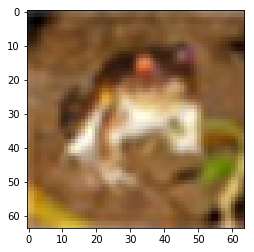

In [13]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.imshow(x_train[0, :, :, :])
plt.show()

In [14]:
y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=num_classes)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [15]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((100, 64, 64, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [16]:
#Build Model

In [17]:
input_shape = (height, width, 3)

In [18]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))  # 처음에만 input_shape를 지정. 후에는 이미 Output_shape을 알기 때문에 불필요 
model.add(MaxPool2D(pool_size=(1, 1)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(1, 1)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(1, 1)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(1, 1)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(1, 1)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [19]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

In [20]:
#Train Model

In [21]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, # Kerase 자체에서 Display를 제공. 0~2까지 있다. 값이 높으면 높을 수록 학습 속도에 영향.
          validation_data=(x_test, y_test))

ValueError: Error when checking input: expected conv2d_1_input to have shape (32, 32, 3) but got array with shape (64, 64, 3)

In [22]:
score = model.evaluate(x_test, y_test)

  192/10000 [..............................] - ETA: 16:22

KeyboardInterrupt: 

In [ ]:
print("Test Loss:\t", score[0])
print("Test Accuracy:\t", score[1])